In [37]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10

mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)



In [38]:
model = tf.keras.models.Sequential([
    # first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)              

In [39]:
from tensorflow.keras.optimizers import SGD

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=1.4e-2, momentum = 0.9),
              metrics=['accuracy'])

In [40]:
history = model.fit(x_train, y_train, batch_size=50, epochs=15,validation_split=0.1)

Epoch 1/15
900/900 [==============================] - 60s 65ms/step - loss: 1.8841 - accuracy: 0.3040 - val_loss: 1.3376 - val_accuracy: 0.5166
Epoch 2/15
900/900 [==============================] - 57s 63ms/step - loss: 1.2999 - accuracy: 0.5298 - val_loss: 1.1506 - val_accuracy: 0.5942
Epoch 3/15
900/900 [==============================] - 57s 63ms/step - loss: 1.0965 - accuracy: 0.6105 - val_loss: 1.0491 - val_accuracy: 0.6292
Epoch 4/15
900/900 [==============================] - 57s 64ms/step - loss: 0.9586 - accuracy: 0.6623 - val_loss: 0.9170 - val_accuracy: 0.6808
Epoch 5/15
900/900 [==============================] - 57s 63ms/step - loss: 0.8411 - accuracy: 0.7057 - val_loss: 0.8930 - val_accuracy: 0.6942
Epoch 6/15
900/900 [==============================] - 57s 63ms/step - loss: 0.7703 - accuracy: 0.7268 - val_loss: 0.8778 - val_accuracy: 0.6988
Epoch 7/15
900/900 [==============================] - 57s 63ms/step - loss: 0.7014 - accuracy: 0.7529 - val_loss: 0.8558 - val_accuracy:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


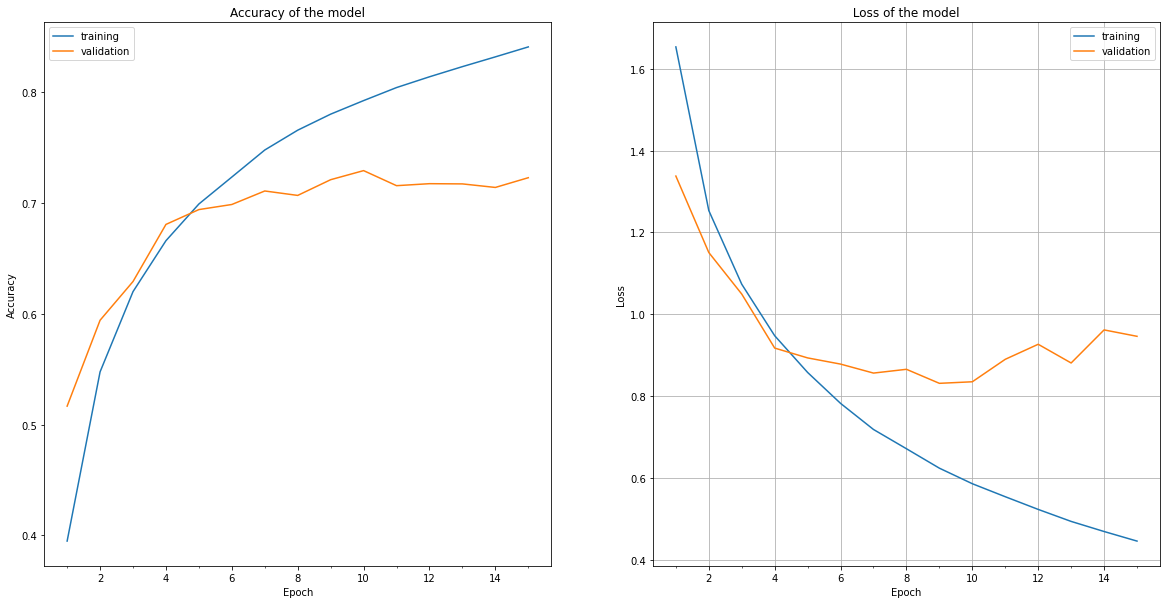

In [57]:
def plot_history(model):
    fig, axs = plt.subplots(1,2,figsize=(20,10))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model.history['accuracy'])+1), 
                model.history['accuracy'])
    axs[0].plot(range(1,len(model.history['val_accuracy'])+1), 
                model.history['val_accuracy'])
    axs[0].set_title('Accuracy of the model')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model.history['accuracy'])+1),
                      len(model.history['accuracy'])/10)
    axs[0].legend(['training', 'validation'])
    plt.grid()
    # summarize history for loss
    axs[1].plot(range(1,len(model.history['loss'])+1),
                model.history['loss'])
    axs[1].plot(range(1,len(model.history['val_loss'])+1), 
                model.history['val_loss'])
    axs[1].set_title(' Loss of the model ')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model.history['loss'])+1),
                      len(model.history['loss'])/10)
    axs[1].legend(['training', 'validation'])
    plt.grid(True)
    plt.show()
plot_history(history)